In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [6]:
def sigmoid(t):
    return 1/ (1 + np.exp(-t))

In [18]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)


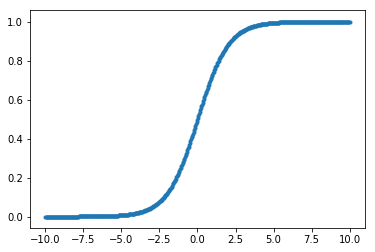

In [19]:
plt.scatter(x,y,marker='.' )
plt.show()

In [33]:
import numpy as np
from playML.metrics import accuracy_score

class LogisticRegression:

    def __init__(self):
        """初始化Logistic Regression模型"""
        self.coef_ = None
        self.intercept_ = None
        self._theta = None
    def _sigmoid(self, t):
        return 1/ (1 + np.exp(-t))
        
    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):
        """根据训练数据集X_train, y_train, 使用梯度下降法训练Logistic Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], \
            "the size of X_train must be equal to the size of y_train"

        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return np.sum(y* np.log(y_hat) + (1-y)*np.log(1-y_hat) ) / len(y)
            except:
                return float('inf')

        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta)) - y)/ len(y)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self._theta[0]
        self.coef_ = self._theta[1:]

        return self

    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果概率向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))

    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.intercept_ is not None and self.coef_ is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == len(self.coef_), \
            "the feature number of X_predict must be equal to X_train"

        proba = self.predict_proba(X_predict)
        return np.array(proba >=0.5, dtype='int')

    def score(self, X_test, y_test):
        """根据测试数据集 X_test 和 y_test 确定当前模型的准确度"""

        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)

    def __repr__(self):
        return "LogisticRegression()"


In [24]:
iris = datasets.load_iris()

In [25]:
X = iris.data
y = iris.target

In [26]:
X = X[y<2, :2]
y = y[y<2]

In [28]:
X.shape


(100, 2)

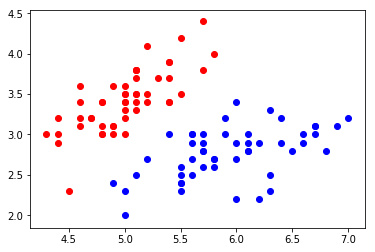

In [29]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [38]:
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [36]:
log_reg.score(X_test, y_test)

1.0

In [39]:
log_reg.predict_proba(X_test)

array([0.99613921, 0.00967636, 0.04259488, 0.90298416, 0.04259488,
       0.05670925, 0.71488038, 0.0517466 , 0.06336061, 0.08294585,
       0.01433708, 0.90298416, 0.00967636, 0.77396545, 0.97646681,
       0.95869439, 0.9542254 , 0.00592252, 0.84884184, 0.02403243,
       0.98471862, 0.9840687 , 0.05727775, 0.77210958, 0.04302834])

In [41]:
np.argsort(log_reg.predict_proba(X_test))

array([17, 12,  1, 10, 19,  2,  4, 24,  7,  5, 22,  8,  9,  6, 23, 13, 18,
       11,  3, 16, 15, 14, 21, 20,  0])

In [42]:
def x2(x1):
    return (-log_reg.coef_[0]*x1 - log_reg.intercept_) / log_reg.coef_[1]

In [43]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

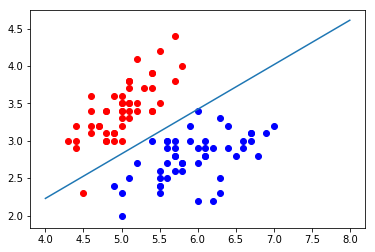

In [45]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.plot(x1_plot, x2_plot)
plt.show()

In [46]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:,1] **2 < 1.5 , dtype='int')

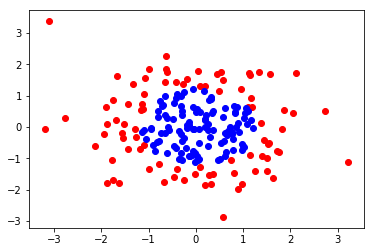

In [50]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='red')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue')
plt.show()

In [52]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [53]:
log_reg.score(X,y)

0.605

In [54]:
  def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


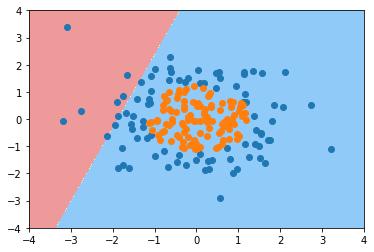

In [55]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [57]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

In [58]:
poly_log_reg.score(X, y)

0.95

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


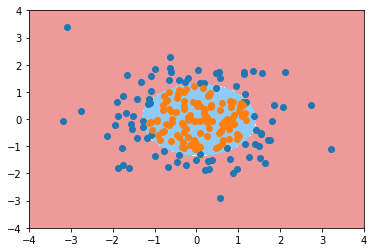

In [59]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [60]:
np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:,1]  < 1.5 , dtype='int')

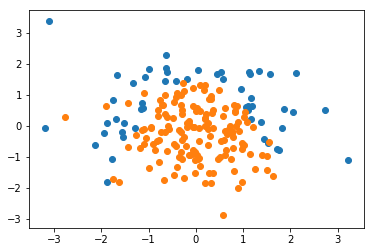

In [61]:
for _ in range(20):
    y[np.random.randint(200)] = 1
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
log_reg.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
log_reg.score(X_test, y_test)

0.8

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


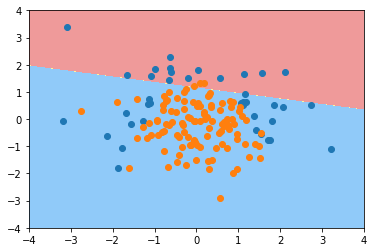

In [65]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])
plt.show()

In [76]:
def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [77]:
poly_log_reg = PolynomialLogisticRegression(degree=20)

In [78]:
poly_log_reg.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [79]:
poly_log_reg.score(X_test, y_test)

0.92

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


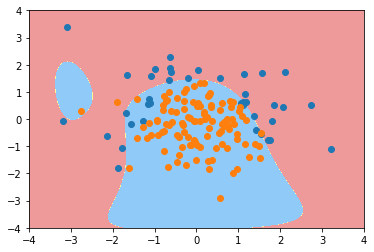

In [80]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1])
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1])
plt.show()

In [82]:
def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [85]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1)

In [86]:
poly_log_reg3.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [87]:
poly_log_reg3.score(X_test, y_test)

0.86

In [94]:
iris = datasets.load_iris()
X = iris.data[:, :]
y= iris.target

In [102]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='newton-cg')
X_train, X_test, y_train, y_test = train_test_split(X, y)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
log_reg.score(X_test, y_test)

0.9736842105263158